# 🔍 Uncertainty Analysis Workshop
This notebook will guide you through:
- Entering measurement data
- Calculating mean, standard deviation, SEM
- Plotting measurements with uncertainty
- Propagating uncertainty through calculations
- Computing confidence intervals

# **📥 Upload Your Own Data**

In [6]:
58.6
import pandas as pd

# Hỏi số phép đo
N = int(input("Nhập số lần đo: "))

# Nhập dữ liệu từng lần đo
lengths = []
widths = []
for i in range(N):
    L = float(input(f"Nhập chiều dài L{i+1} (cm): "))
    W = float(input(f"Nhập chiều rộng W{i+1} (cm): "))
    lengths.append(L)
    widths.append(W)

# Tạo DataFrame và thêm cột Diện tích
df = pd.DataFrame({
    "Length_cm": lengths,
    "Width_cm": widths
})
df["Area_cm2"] = df["Length_cm"] * df["Width_cm"]

# In kết quả
print("\nDữ liệu đo kèm diện tích:")
print(df)





Nhập số lần đo: 3
Nhập chiều dài L1 (cm): 8.6
Nhập chiều rộng W1 (cm): 5.5
Nhập chiều dài L2 (cm): 8.6
Nhập chiều rộng W2 (cm): 5.45
Nhập chiều dài L3 (cm): 8.55
Nhập chiều rộng W3 (cm): 5.45

Dữ liệu đo kèm diện tích:
   Length_cm  Width_cm  Area_cm2
0       8.60      5.50   47.3000
1       8.60      5.45   46.8700
2       8.55      5.45   46.5975


In [7]:
# 📦 Install and import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import pandas as pd


## 📊 Calculate Mean, Standard Deviation, SEM and uncertainty

In [8]:
import numpy as np
import pandas as pd
from scipy.stats import t

# Hiển thị các cột số trong DataFrame
print("Available numeric columns:", list(df.select_dtypes(include='number').columns))
col = input("Enter the column name to analyze: ")

# Kiểm tra cột
if col not in df.columns:
    raise ValueError("Invalid column name! Please run again.")

# Lấy dữ liệu từ cột
values = df[col].dropna().to_numpy()
N = len(values)
mean = np.mean(values)

# Population SD (σ)
pop_sd = np.sqrt(np.sum((values - mean)**2) / N)

# Sample SD (s)
samp_sd = np.std(values, ddof=1)

# SEM
sem = samp_sd / np.sqrt(N)

# 95% Confidence Interval
confidence = 0.95
t_val = t.ppf((1+confidence)/2, df=N-1)
ci = t_val * sem

# In kết quả
print(f"\nResults for column: {col}")
print(f"N = {N}")
print(f"Mean = {mean:.3f}")
print(f"Population SD (σ) = {pop_sd:.3f}")
print(f"Sample SD (s) = {samp_sd:.3f}")
print(f"SEM = {sem:.3f}")
print(f"95% Confidence Interval: {mean:.3f} ± {ci:.3f}")


Available numeric columns: ['Length_cm', 'Width_cm', 'Area_cm2']
Enter the column name to analyze: Length_cm

Results for column: Length_cm
N = 3
Mean = 8.583
Population SD (σ) = 0.024
Sample SD (s) = 0.029
SEM = 0.017
95% Confidence Interval: 8.583 ± 0.072


In [4]:
# Bảng tra t
from scipy.stats import t

# Nhập số lần đo và mức tin cậy
n = int(input("Nhập số lần đo: "))
confidence = 0.95  # hoặc đổi sang 0.99 nếu muốn CI 99%

dof = n - 1 # Changed variable name from df to dof
t_value = t.ppf((1 + confidence) / 2, dof)

print(f"Số lần đo: {n}")
print(f"Degrees of freedom (dof): {dof}")
print(f"t-value (với {confidence*100:.0f}% CI): {t_value:.3f}")

Nhập số lần đo: 2
Số lần đo: 2
Degrees of freedom (df): 1
t-value (với 95% CI): 12.706


## 📈 Visualize the Data

Length_cm: Mean = 8.583, True Value = 8.600, Bias Error = -0.017
Width_cm: Mean = 5.467, True Value = 5.450, Bias Error = 0.017
Area_cm2: Mean = 46.922, True Value = 46.870, Bias Error = 0.052


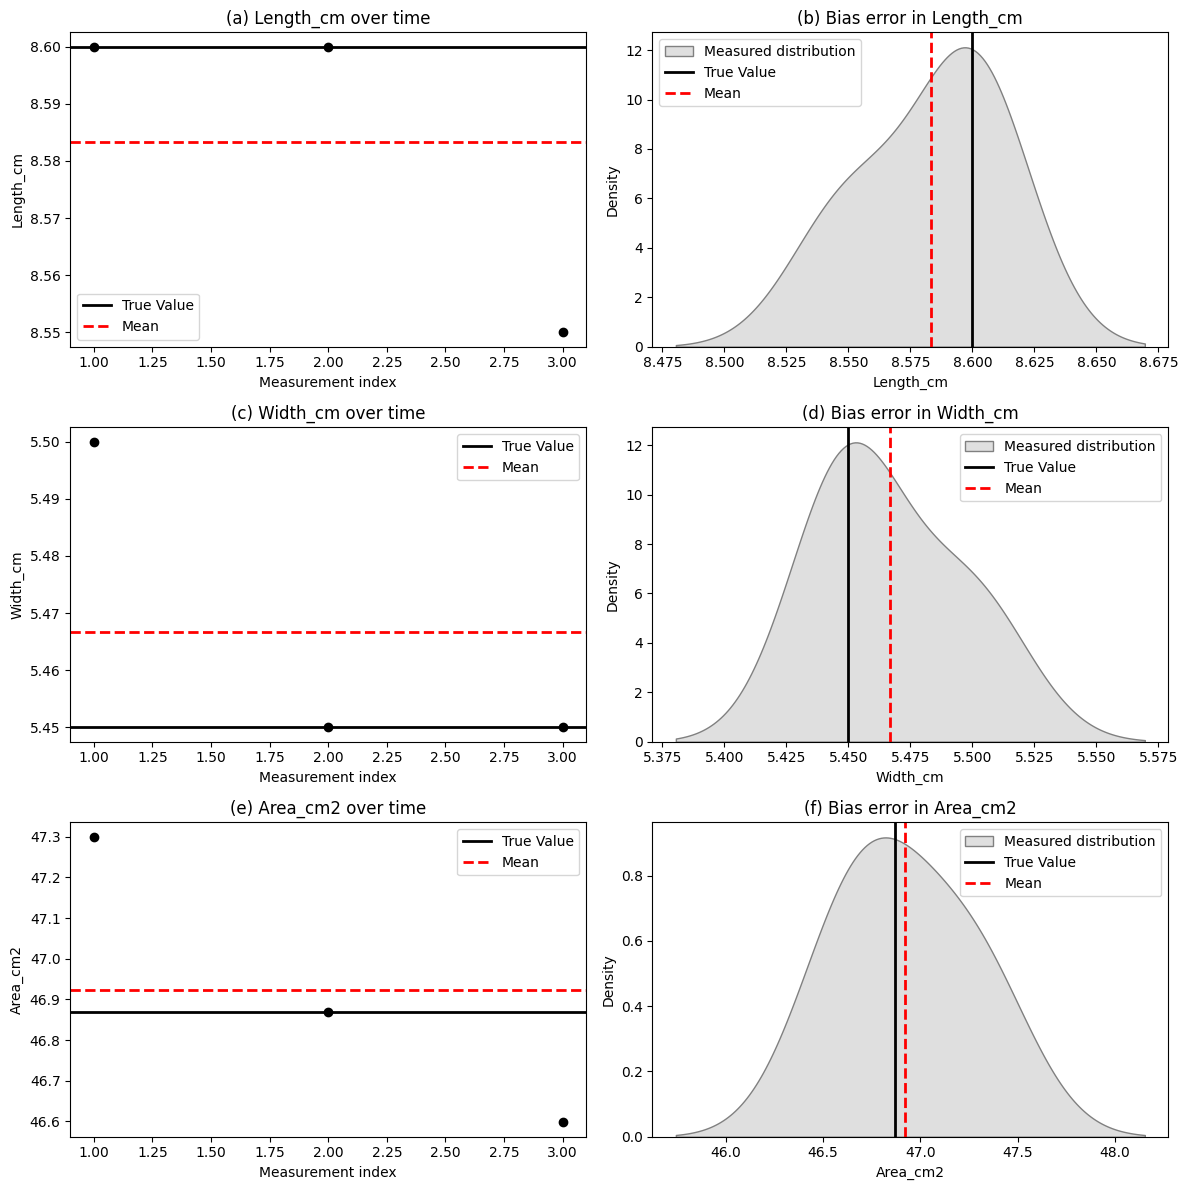

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Danh sách cột numeric để vẽ
columns = ['Length_cm', 'Width_cm', 'Area_cm2']

# Tạo figure với 3 hàng, 2 cột
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for idx, col in enumerate(columns):
    values = df[col].dropna().to_numpy()
    N = len(values)
    mean = np.mean(values)
    true_value = np.median(values)  # dùng median làm giá trị tham chiếu
    bias_error = mean - true_value
    time = np.arange(1, N+1)

    # In Bias Error
    print(f"{col}: Mean = {mean:.3f}, True Value = {true_value:.3f}, Bias Error = {bias_error:.3f}")

    # ---- (a) Measurements over time ----
    ax1 = axes[idx, 0]
    ax1.scatter(time, values, color='black')
    ax1.axhline(true_value, color='black', linewidth=2, label='True Value')
    ax1.axhline(mean, color='red', linestyle='--', linewidth=2, label='Mean')
    ax1.set_xlabel("Measurement index")
    ax1.set_ylabel(col)
    ax1.set_title(f"({chr(97+idx*2)}) {col} over time")
    ax1.legend()

    # ---- (b) Distribution ----
    ax2 = axes[idx, 1]
    sns.kdeplot(values, fill=True, color='gray', ax=ax2, label='Measured distribution')
    ax2.axvline(true_value, color='black', linestyle='-', linewidth=2, label='True Value')
    ax2.axvline(mean, color='red', linestyle='--', linewidth=2, label='Mean')
    ax2.set_xlabel(col)
    ax2.set_ylabel("Density")
    ax2.set_title(f"({chr(98+idx*2)}) Bias error in {col}")
    ax2.legend()

plt.tight_layout()
plt.show()

## 🔗 Propagate Uncertainty

In [10]:
import numpy as np

# Lấy dữ liệu từ cột
lengths = df['Length_cm'].dropna().to_numpy()
widths = df['Width_cm'].dropna().to_numpy()

# Tính Mean
mean_L = np.mean(lengths)
mean_W = np.mean(widths)

# Tính SD (Sample Standard Deviation)
std_L = np.std(lengths, ddof=1)
std_W = np.std(widths, ddof=1)

# Tính SEM (Standard Error of Mean)
sem_L = std_L / np.sqrt(len(lengths))
sem_W = std_W / np.sqrt(len(widths))

# Tính diện tích trung bình
A = mean_L * mean_W

# Lan truyền sai số (Propagation of Uncertainty)
uA = A * np.sqrt((sem_L / mean_L)**2 + (sem_W / mean_W)**2)

print(f"Mean Length: {mean_L:.3f} ± {sem_L:.3f} cm")
print(f"Mean Width: {mean_W:.3f} ± {sem_W:.3f} cm")
print(f"Area: {A:.3f} ± {uA:.3f} cm²")


Mean Length: 8.583 ± 0.017 cm
Mean Width: 5.467 ± 0.017 cm
Area: 46.922 ± 0.170 cm²
